# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from graphviz import Source
from IPython.display import SVG

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Data Cleaning

In [3]:
df = pd.read_excel('dataset/default of credit card clients.xls',header=1)

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.shape

(30000, 25)

In [7]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [8]:
df.SEX.replace({1:'male', 2:'female'}, inplace=True)
df.EDUCATION.replace({1: 'graduate school', 2 :'university', 3: 'high school', 4 :'others',5:'others', 6:'others', 0:'others'}, inplace=True)
df.MARRIAGE.replace({1:'married', 2:'single', 3:'others'}, inplace=True)
df.rename(columns={'default payment next month': 'default'}, inplace=True)

In [9]:
df['default'].std()

0.41506180569093337

In [10]:
print(df.query('EDUCATION == "graduate school"')['default'].value_counts(normalize=1),
      df.query('EDUCATION == "university"')['default'].value_counts(normalize=1),
      df.query('EDUCATION == "others"')['default'].value_counts(normalize=1),
      df.query('EDUCATION == "high school"')['default'].value_counts(normalize=1), sep='\n')

0    0.807652
1    0.192348
Name: default, dtype: float64
0    0.762651
1    0.237349
Name: default, dtype: float64
0    0.929487
1    0.070513
Name: default, dtype: float64
0    0.748424
1    0.251576
Name: default, dtype: float64


In [11]:
df.query('EDUCATION == "graduate school"')['default'].std()**2

0.15536471661041473

In [12]:
df.query('EDUCATION == "high school"')['default'].std()**2

0.18832389843906816

In [13]:
sqrt((.15536+.18832)/2)

0.41453588505701167

In [14]:
(.1923-.2515)/.4145

-0.1428226779252111

In [15]:
print(df.query('EDUCATION == "graduate school"')['LIMIT_BAL'].mean(),
      df.query('EDUCATION == "university"')['LIMIT_BAL'].mean(),
      df.query('EDUCATION == "high school"')['LIMIT_BAL'].mean())

212956.06991025034 147062.4376336422 126550.27049013626


In [16]:
df.query('PAY_0 == -2 & PAY_2 == -2 & PAY_3 == -2 & PAY_4 == -2 & PAY_5 == -2 & PAY_6 == -2').iloc[:,8:20]

,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2
23,-2,-2,-2,-2,5512,19420,1473,560,0,0,19428,1473
33,-2,-2,-2,-2,10929,4152,22722,7521,71439,8981,4152,22827
34,-2,-2,-2,-2,13709,5006,31130,3180,0,5293,5006,31178
45,-2,-2,-2,-2,0,0,0,0,0,0,0,0
52,-2,-2,-2,-2,13465,7867,7600,11185,3544,464,7875,7600
...,...,...,...,...,...,...,...,...,...,...,...,...
29937,-2,-2,-2,-2,14075,6813,13482,2975,2029,888,6818,13482
29961,-2,-2,-2,-2,0,263,0,1368,101,955,263,0
29979,-2,-2,-2,-2,0,0,0,0,0,0,0,0
29983,-2,-2,-2,-2,1822,2872,2712,2882,9235,1719,2890,2720


In [17]:
df.drop(['BILL_AMT1', 'PAY_AMT6'], axis=1, inplace=True)

In [18]:
df.describe()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,0.221200
std,8660.398374,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,0.415062
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,0.000000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,0.000000
max,30000.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,1.000000


In [19]:
df.default.value_counts()
6636/30000

0.2212

In [20]:
for i in range(0,5):
    df[f'payment_delta{i}'] = df[f'BILL_AMT{6-i}'] - df[f'PAY_AMT{5-i}']

In [21]:
df.MARRIAGE.replace(0,'others',inplace=True)

In [22]:
df.PAY_6.value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64

In [23]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'default', 'payment_delta0',
       'payment_delta1', 'payment_delta2', 'payment_delta3', 'payment_delta4'],
      dtype='object')

In [24]:
rate = {}
for i in range(-2,9,1):
    rate[i] = df.query(f'PAY_6 >= {i} or PAY_5 >= {i} or PAY_4 >= {i} or PAY_3 >= {i} or PAY_2 >= {i} or PAY_0 >= {i}').loc[:,'default'].value_counts(normalize=True)[1]

In [25]:
print(rate)

{-2: 0.2212, -1: 0.2277437166110932, 0: 0.237774642209232, 1: 0.4272519614658854, 2: 0.4630071599045346, 3: 0.6286672254819782, 4: 0.6410891089108911, 5: 0.6397849462365591, 6: 0.717948717948718, 7: 0.7608695652173914, 8: 0.56}


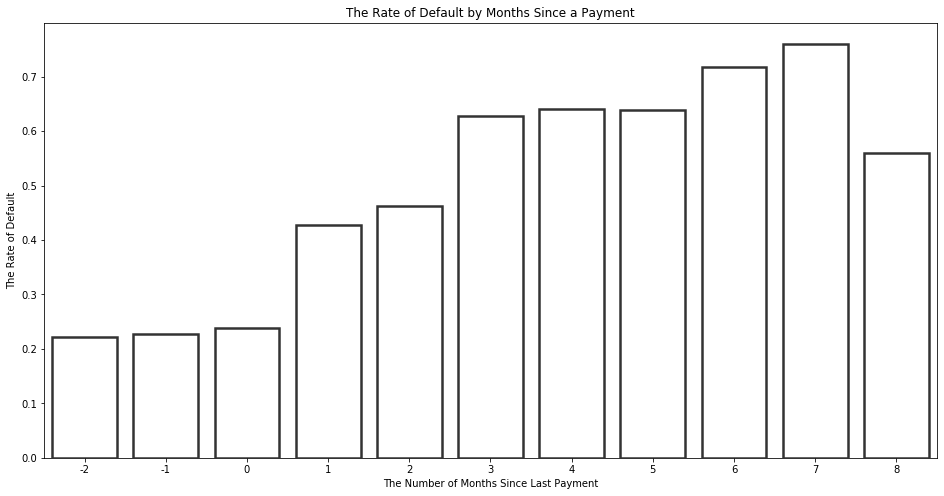

<Figure size 432x288 with 0 Axes>

In [26]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(x = list(rate.keys()), y = list(rate.values()), linewidth=2.5, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor=".2")
ax.set(xlabel='The Number of Months Since Last Payment', ylabel='The Rate of Default', title='The Rate of Default by Months Since a Payment')
plt.show()
plt.savefig('The rate of default by months since.png')

In [27]:
print(rate, sep='\n')

{-2: 0.2212, -1: 0.2277437166110932, 0: 0.237774642209232, 1: 0.4272519614658854, 2: 0.4630071599045346, 3: 0.6286672254819782, 4: 0.6410891089108911, 5: 0.6397849462365591, 6: 0.717948717948718, 7: 0.7608695652173914, 8: 0.56}


In [28]:
df.query('LIMIT_BAL < 50000')['default'].value_counts(normalize=True)

0    0.639295
1    0.360705
Name: default, dtype: float64

In [29]:
df.query('LIMIT_BAL < 140000 & LIMIT_BAL >= 50000')['default'].value_counts(normalize=True)

0    0.746139
1    0.253861
Name: default, dtype: float64

In [30]:
df.query('LIMIT_BAL < 240000 & LIMIT_BAL >= 140000')['default'].value_counts(normalize=True)

0    0.82169
1    0.17831
Name: default, dtype: float64

In [31]:
df.query('LIMIT_BAL >= 240000')['default'].value_counts(normalize=True)

0    0.857143
1    0.142857
Name: default, dtype: float64

In [32]:
df.MARRIAGE.value_counts()

single     15964
married    13659
others       377
Name: MARRIAGE, dtype: int64

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


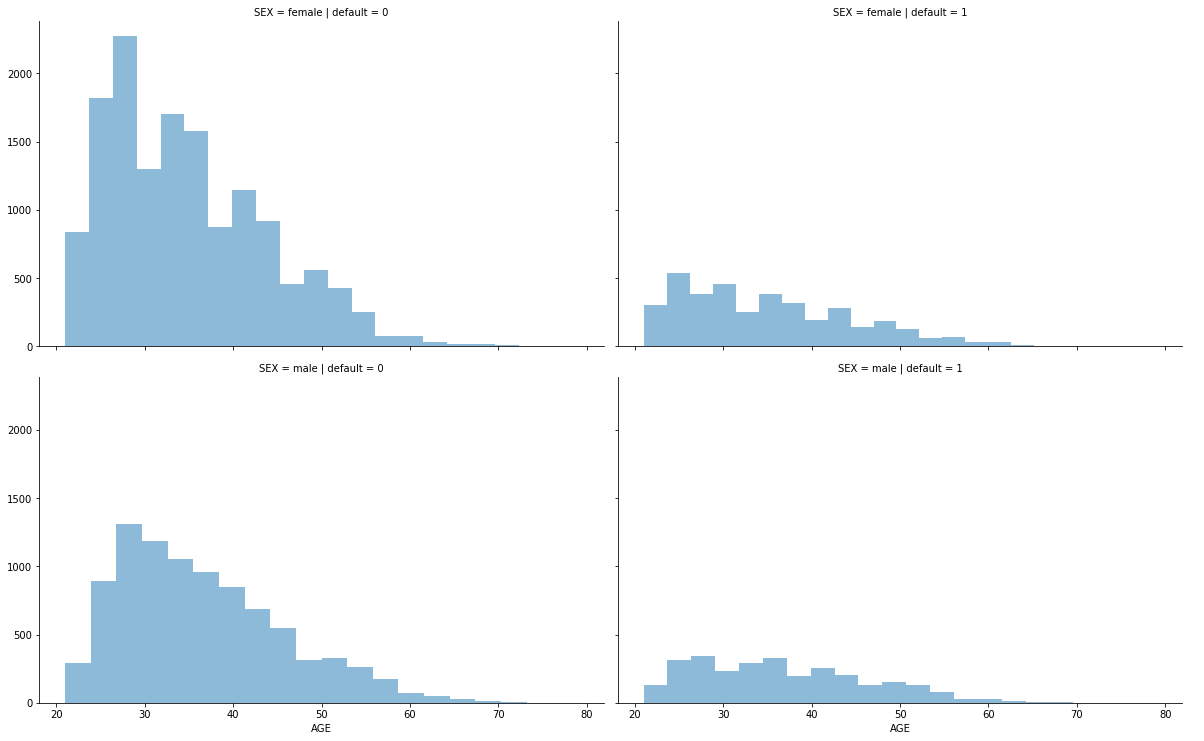

In [33]:
grid = sns.FacetGrid(df, col='default', row='SEX', size=5.2, aspect=1.6)
grid.map(plt.hist, 'AGE', alpha=.5, bins=20)
grid.add_legend()
plt.savefig('sex default age.png');

In [34]:
df = pd.get_dummies(df, drop_first=True)

In [35]:
df.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [36]:
target = df['default']
features = df.drop('default', axis=1)

In [37]:
target.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [38]:
6636/30000

0.2212

# Test train split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [40]:
smote = SMOTE()

X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)

In [41]:
X_train_resampled.shape

(35178, 30)

In [42]:
pd.Series(y_train_resampled).value_counts()

1    17589
0    17589
dtype: int64

# Modeling

# Logistic Regression

In [43]:
logi = LogisticRegression(fit_intercept=False, solver='liblinear')
model = logi.fit(X_train, y_train)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_hat_test = model.predict(X_test)
y_hat_train = model.predict(X_train)
acc_log = round(logi.score(X_train, y_train) * 100, 2)
acc_log

78.17

In [45]:
print(confusion_matrix(y_train, y_hat_train), confusion_matrix(y_test, y_hat_test), sep='\n---------------\n')

[[17588     1]
 [ 4911     0]]
---------------
[[5775    0]
 [1725    0]]


In [46]:
print('Logistic Regression:\n 1. train 2. test')
print(classification_report(y_train, y_hat_train), classification_report(y_test, y_hat_test), sep='\n-------------------------------------------------------\n')

Logistic Regression:
 1. train 2. test
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     17589
           1       0.00      0.00      0.00      4911

    accuracy                           0.78     22500
   macro avg       0.39      0.50      0.44     22500
weighted avg       0.61      0.78      0.69     22500

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      5775
           1       0.00      0.00      0.00      1725

    accuracy                           0.77      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.59      0.77      0.67      7500



/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [47]:
logi_smoted = LogisticRegression(fit_intercept=False, solver='liblinear')
model_smoted = logi_smoted.fit(X_train_resampled, y_train_resampled)

In [48]:
y_hat_train_smoted = model_smoted.predict(X_train)
y_hat_test_smoted = model_smoted.predict(X_test)
acc_log = round(logi_smoted.score(X_train_resampled, y_train_resampled) * 100, 2)
acc_log

61.8

In [49]:
print(confusion_matrix(y_train, y_hat_train_smoted), confusion_matrix(y_test, y_hat_test_smoted), sep='\n---------------\n')

[[9168 8421]
 [1429 3482]]
---------------
[[2988 2787]
 [ 495 1230]]


In [50]:
print('Smoted Logistic Regression:\n 1. train 2. test')
print(classification_report(y_train, y_hat_train_smoted), classification_report(y_test, y_hat_test_smoted), sep='\n-------------------------------------------------------\n')

Smoted Logistic Regression:
 1. train 2. test
              precision    recall  f1-score   support

           0       0.87      0.52      0.65     17589
           1       0.29      0.71      0.41      4911

    accuracy                           0.56     22500
   macro avg       0.58      0.62      0.53     22500
weighted avg       0.74      0.56      0.60     22500

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.52      0.65      5775
           1       0.31      0.71      0.43      1725

    accuracy                           0.56      7500
   macro avg       0.58      0.62      0.54      7500
weighted avg       0.73      0.56      0.60      7500



0.6606022460631156 [ 2.40560005  1.40560005  0.99074748 ... -6.8597932  -8.53810919
 -9.42828241]
AUC: 0.6606022460631156


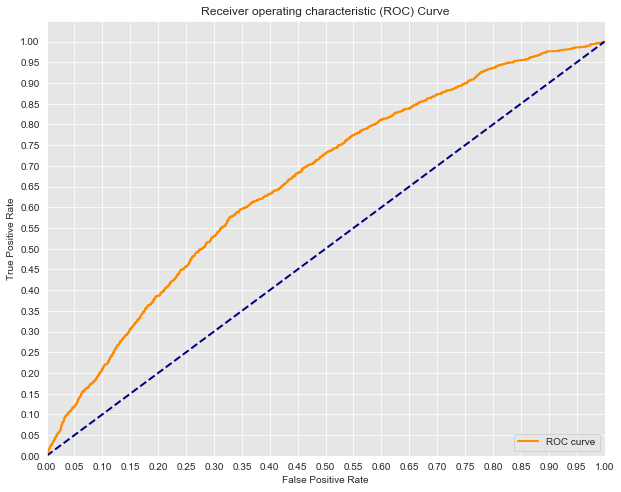

In [51]:
y_score = model_smoted.decision_function(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_score)

print(auc(fpr,tpr), threshold)

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [52]:
logi_smoted.coef_

array([[ 2.57229795e-06, -2.35294568e-06,  1.12635025e-02,
         2.42325980e-03,  1.96353031e-03,  1.68789618e-03,
         1.57166426e-03,  1.46551178e-03,  1.29049255e-03,
         2.93586674e-04,  2.93265604e-04,  3.05704840e-04,
         3.02426009e-04,  2.95170059e-04, -3.14503534e-04,
        -3.16040300e-04, -3.14635773e-04, -3.08063209e-04,
        -3.01024791e-04, -2.92845527e-04, -2.98831790e-04,
        -3.05702558e-04, -2.89812039e-04, -2.98220166e-04,
        -4.02708193e-04, -3.34927278e-04, -6.18847727e-05,
        -4.90917933e-04, -3.75692154e-05, -7.81870540e-04]])

# Support Vector Classification

In [53]:
svc = SVC()
param = {'C': [.1,10,100,1000]}
clf = GridSearchCV(svc, param)

In [54]:
clf.fit(X_train_resampled, y_train_resampled)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:193: Futur

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid={'C': [0.1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [55]:
clf.best_params_

{'C': 10}

In [56]:
svc = SVC(C=10)
svc.fit(X_train_resampled, y_train_resampled)
y_hat_train = svc.predict(X_train)
y_hat_test = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


100.0

In [59]:
confusion_matrix(y_test, y_hat_test)

array([[5770,    5],
       [1719,    6]])

In [60]:
print('SVC:\n 1. train 2. test')
print(classification_report(y_train, y_hat_train), 
      classification_report(y_test, y_hat_test), 
      sep='\n-------------------------------------------------------\n')

SVC:
 1. train 2. test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17589
           1       1.00      1.00      1.00      4911

    accuracy                           1.00     22500
   macro avg       1.00      1.00      1.00     22500
weighted avg       1.00      1.00      1.00     22500

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      5775
           1       0.55      0.00      0.01      1725

    accuracy                           0.77      7500
   macro avg       0.66      0.50      0.44      7500
weighted avg       0.72      0.77      0.67      7500



In [61]:
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
print(tn, fp, fn, tp)

5770 5 1719 6


0.5017389296693646 [ 1.29054216e+00  2.90542163e-01  4.90136087e-03  4.54948030e-03
  3.08574850e-03  3.12121234e-04  7.39525430e-05  3.85194563e-05
 -9.81444129e-04 -9.98950079e-04 -1.00423011e-03 -1.00432582e-03
 -1.00432904e-03 -1.00433120e-03 -1.00433200e-03 -1.00433202e-03
 -1.00433202e-03 -1.00433202e-03 -1.00435563e-03 -1.00462761e-03
 -1.00831177e-03 -1.01893503e-03 -1.03277448e-03 -2.83857242e-03
 -6.07043880e-01]
AUC: 0.5017389296693646


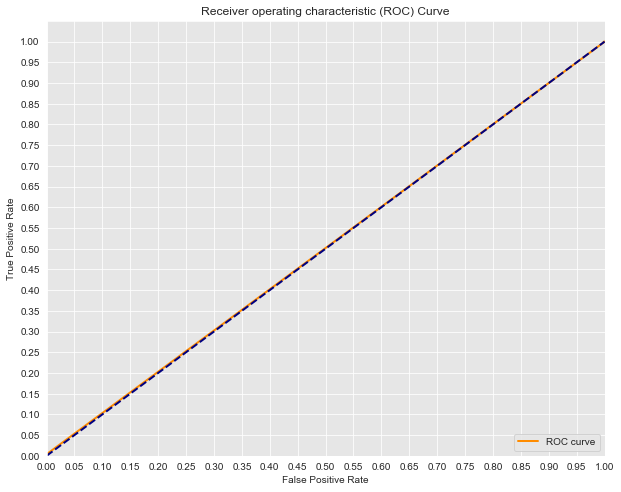

In [62]:
y_score = svc.decision_function(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_score)

print(auc(fpr,tpr), threshold)

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# KNN 

In [63]:
knn = KNeighborsClassifier(n_neighbors = i)

clf = GridSearchCV(knn, param_grid = {'n_neighbors': range(3,20,2)})
clf.fit(X_train_resampled, y_train_resampled)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=8, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(3, 20, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [64]:
clf.best_params_

{'n_neighbors': 3}

In [65]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_resampled, y_train_resampled)
y_hat_train = knn.predict(X_train)
y_hat_test = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

83.24

In [66]:
confusion_matrix(y_test,y_hat_test)

array([[3668, 2107],
       [ 867,  858]])

In [67]:
print('KNN:\n 1. train 2. test')
print(classification_report(y_train, y_hat_train), 
      classification_report(y_test, y_hat_test), 
      sep='\n-------------------------------------------------------\n')

KNN:
 1. train 2. test
              precision    recall  f1-score   support

           0       0.99      0.80      0.88     17589
           1       0.57      0.96      0.71      4911

    accuracy                           0.83     22500
   macro avg       0.78      0.88      0.80     22500
weighted avg       0.90      0.83      0.84     22500

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.64      0.71      5775
           1       0.29      0.50      0.37      1725

    accuracy                           0.60      7500
   macro avg       0.55      0.57      0.54      7500
weighted avg       0.69      0.60      0.63      7500



In [68]:
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
print(tn, fp, fn, tp)

3668 2107 867 858


0.5879944287596461 [2.         1.         0.66666667 0.33333333 0.        ]
AUC: 0.5879944287596461


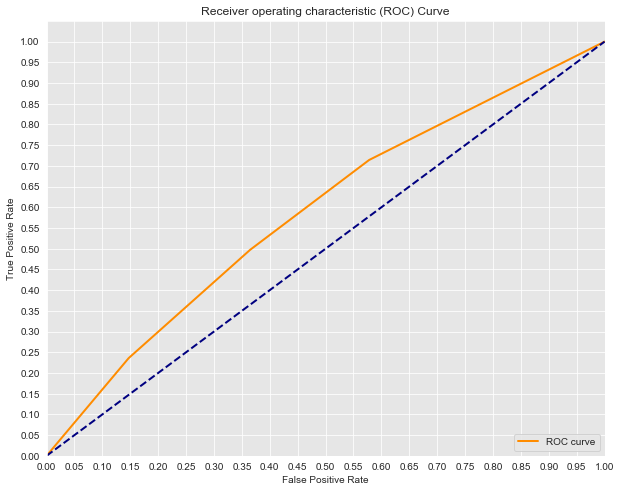

In [69]:
y_score = knn.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_score[:,1])

print(auc(fpr,tpr), threshold)

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Naive Bayes

In [70]:
gaussian = GaussianNB()
gaussian.fit(X_train_resampled, y_train_resampled)
y_hat_train = gaussian.predict(X_train)
y_hat_test = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

32.44

In [71]:
print('GaussianNB:\n 1. train 2. test')
print(classification_report(y_train, y_hat_train), 
      classification_report(y_test, y_hat_test), 
      sep='\n-------------------------------------------------------\n')

GaussianNB:
 1. train 2. test
              precision    recall  f1-score   support

           0       0.88      0.16      0.27     17589
           1       0.23      0.92      0.37      4911

    accuracy                           0.32     22500
   macro avg       0.56      0.54      0.32     22500
weighted avg       0.74      0.32      0.29     22500

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.15      0.26      5775
           1       0.25      0.92      0.39      1725

    accuracy                           0.33      7500
   macro avg       0.56      0.54      0.33      7500
weighted avg       0.73      0.33      0.29      7500



In [72]:
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
print(tn, fp, fn, tp)

893 4882 134 1591


0.6536435159043855 [1.99541699e+000 9.95416986e-001 9.92684818e-001 ... 2.17911104e-300
 6.42285340e-323 0.00000000e+000]
AUC: 0.6536435159043855


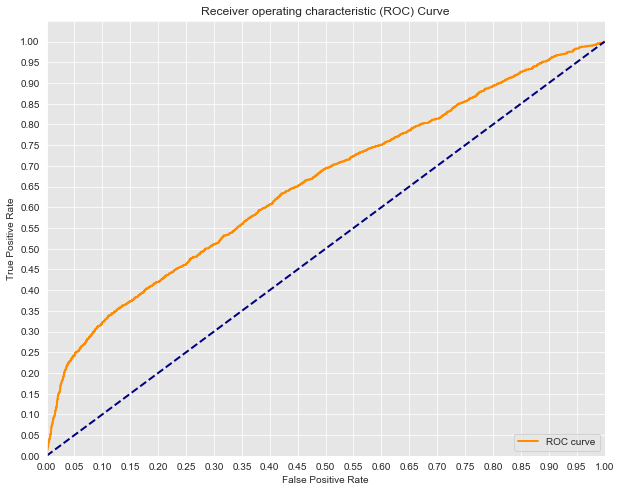

In [73]:
y_score = gaussian.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_score[:,1])

print(auc(fpr,tpr), threshold)

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Linear SVC

In [74]:
linear_svc = LinearSVC()
clf = GridSearchCV(linear_svc, param_grid = {'C': [.1, 1, 10, 100]})
clf.fit(X_train_resampled, y_train_resampled)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None, param_grid={'C': [0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [75]:
clf.best_params_

{'C': 100}

In [76]:
linear_svc = LinearSVC(C= 100)
linear_svc.fit(X_train_resampled, y_train_resampled)
y_hat_train = linear_svc.predict(X_train)
y_hat_test = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


57.78

In [77]:
print('Linear SVC:\n 1. train 2. test')
print(classification_report(y_train, y_hat_train), 
      classification_report(y_test, y_hat_test), 
      sep='\n-------------------------------------------------------\n')

Linear SVC:
 1. train 2. test
              precision    recall  f1-score   support

           0       0.85      0.56      0.68     17589
           1       0.29      0.63      0.40      4911

    accuracy                           0.58     22500
   macro avg       0.57      0.60      0.54     22500
weighted avg       0.72      0.58      0.61     22500

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.55      0.66      5775
           1       0.30      0.64      0.40      1725

    accuracy                           0.57      7500
   macro avg       0.57      0.59      0.53      7500
weighted avg       0.71      0.57      0.60      7500



In [78]:
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
print(tn, fp, fn, tp)

3165 2610 625 1100


0.6367850429763473 [  7.04402895   6.04402895   3.90433138 ... -11.18947444 -11.21303544
 -18.60210874]
AUC: 0.6367850429763473


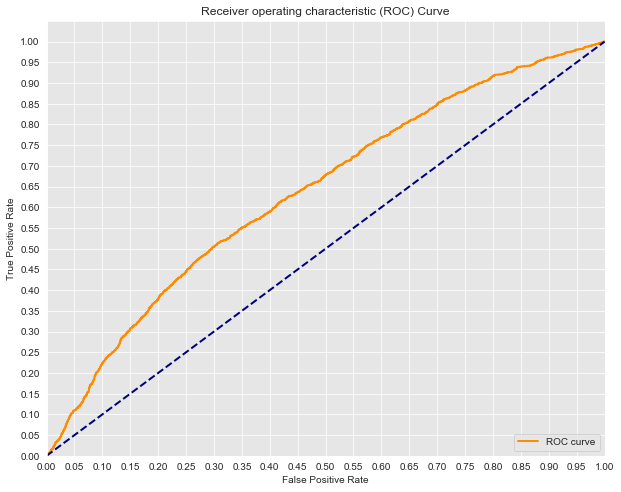

In [79]:
y_score = linear_svc.decision_function(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_score)

print(auc(fpr,tpr), threshold)

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Stochastic Gradient Descent

In [80]:
sgd = SGDClassifier()
sgd.fit(X_train_resampled, y_train_resampled)
y_hat_train = sgd.predict(X_train)
y_hat_test = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

48.28

In [81]:
print('Stochastic Gradient Descent:\n 1. train 2. test')
print(classification_report(y_train, y_hat_train), 
      classification_report(y_test, y_hat_test), 
      sep='\n-------------------------------------------------------\n')

Stochastic Gradient Descent:
 1. train 2. test
              precision    recall  f1-score   support

           0       0.84      0.42      0.56     17589
           1       0.26      0.72      0.38      4911

    accuracy                           0.48     22500
   macro avg       0.55      0.57      0.47     22500
weighted avg       0.72      0.48      0.52     22500

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.42      0.56      5775
           1       0.27      0.72      0.39      1725

    accuracy                           0.49      7500
   macro avg       0.55      0.57      0.48      7500
weighted avg       0.70      0.49      0.52      7500



In [82]:
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
print(tn, fp, fn, tp)

2416 3359 482 1243


0.5755268962921136 [ 9.77856834e+08  9.77856833e+08  8.99448524e+08 ... -6.34075104e+08
 -6.36715380e+08 -6.88812328e+08]
AUC: 0.5755268962921136


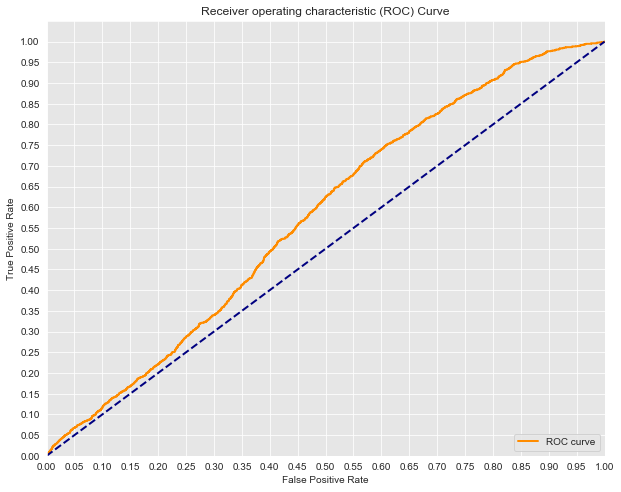

In [83]:
y_score = sgd.decision_function(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_score)

print(auc(fpr,tpr), threshold)

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Decision Tree

In [84]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_resampled, y_train_resampled)
y_hat_train = decision_tree.predict(X_train)
y_hat_test = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

100.0

In [85]:
#first we set up a grid of hyperparameters we want to "search over"
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9],
    'min_samples_split': [8, 10, 12, 14],
}

#then we conduct the "search"
gs = GridSearchCV(estimator = decision_tree, param_grid = param_grid, 
                          cv = 5)
gs.fit(X_train_resampled, y_train_resampled)
#finally we find the best hyperparameters
gs.best_params_

{'max_depth': 9,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 10}

In [86]:
best_DT=gs.best_estimator_

best_dt = best_DT.fit(X_train_resampled, y_train_resampled)
y_hat_train = best_DT.predict(X_train)
y_hat_test = best_DT.predict(X_test)
best_DT.score(X_test, y_test)

0.6730666666666667

In [87]:
print('Decision Tree:\n 1. train 2. test')
print(classification_report(y_train, y_hat_train), 
      classification_report(y_test, y_hat_test), 
      sep='\n-------------------------------------------------------\n')

Decision Tree:
 1. train 2. test
              precision    recall  f1-score   support

           0       0.86      0.74      0.79     17589
           1       0.38      0.56      0.45      4911

    accuracy                           0.70     22500
   macro avg       0.62      0.65      0.62     22500
weighted avg       0.75      0.70      0.72     22500

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.72      0.77      5775
           1       0.35      0.51      0.42      1725

    accuracy                           0.67      7500
   macro avg       0.59      0.62      0.60      7500
weighted avg       0.72      0.67      0.69      7500



In [89]:
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
print(tn, fp, fn, tp)

4161 1614 838 887


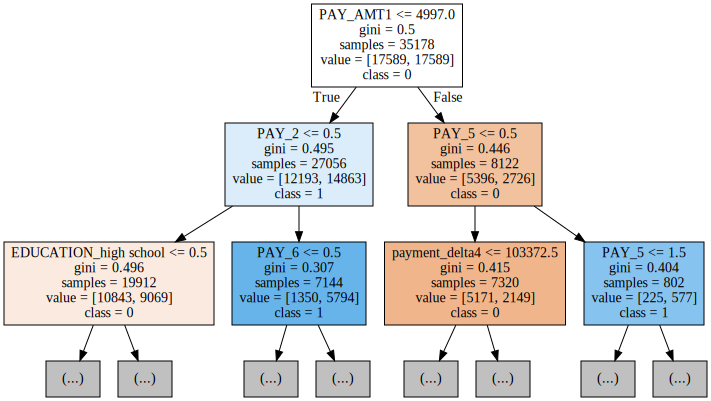

<Figure size 1728x1008 with 0 Axes>

In [90]:
labels = features.columns
plt.figure(figsize=(24,14))
graph = Source(tree.export_graphviz(best_DT, out_file=None, 
                                    feature_names=labels, class_names=['0', '1', '2'], 
                                    filled = True, max_depth = 2))
display(SVG(graph.pipe(format='svg')))
plt.savefig('decisiontree.png')

0.6740434406173537 [2.         1.         0.98843931 0.97777778 0.976      0.96428571
 0.96296296 0.95157895 0.94117647 0.93589744 0.93333333 0.9137931
 0.90909091 0.90566038 0.90196078 0.89473684 0.875      0.86666667
 0.86387435 0.85714286 0.85507246 0.85416667 0.84962406 0.84375
 0.84210526 0.83333333 0.82352941 0.81538462 0.8125     0.80714286
 0.8        0.79310345 0.77777778 0.76027397 0.76       0.75555556
 0.75       0.74074074 0.73076923 0.72222222 0.72131148 0.71428571
 0.70927536 0.6949429  0.69158879 0.68627451 0.67669173 0.66666667
 0.6599665  0.65671642 0.64705882 0.64498141 0.64285714 0.63888889
 0.61290323 0.60796915 0.60714286 0.60465116 0.6        0.59663866
 0.58333333 0.55       0.54341737 0.54270139 0.54035568 0.54014599
 0.52054795 0.51515152 0.51282051 0.5        0.49733333 0.47058824
 0.46963563 0.45454545 0.4516129  0.44444444 0.44186047 0.44
 0.4257975  0.415      0.41290323 0.41176471 0.40837696 0.4
 0.39411765 0.39240506 0.38888889 0.38461538 0.38095238 0.37

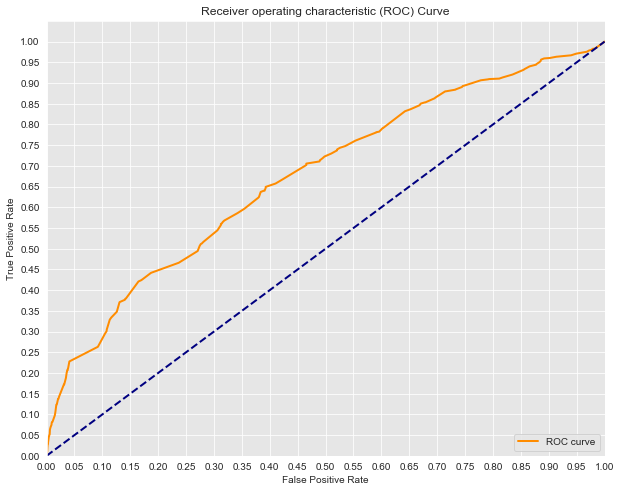

In [91]:
y_score = best_DT.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_score[:,1])

print(auc(fpr,tpr), threshold)

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show();

# Random Forest

In [92]:
random_forest = RandomForestClassifier(n_estimators=100,max_depth=5)
random_forest.fit(X_train_resampled, y_train_resampled)
y_hat_train = random_forest.predict(X_train)
y_hat_test = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

77.91

In [93]:
print('Decision Tree:\n 1. train 2. test')
print(classification_report(y_train, y_hat_train), 
      classification_report(y_test, y_hat_test), 
      sep='\n-------------------------------------------------------\n')

Decision Tree:
 1. train 2. test
              precision    recall  f1-score   support

           0       0.88      0.84      0.86     17589
           1       0.49      0.58      0.53      4911

    accuracy                           0.78     22500
   macro avg       0.69      0.71      0.69     22500
weighted avg       0.79      0.78      0.78     22500

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      5775
           1       0.49      0.54      0.51      1725

    accuracy                           0.76      7500
   macro avg       0.67      0.69      0.68      7500
weighted avg       0.77      0.76      0.77      7500



0.7451134952004517 [1.91975758 0.91975758 0.86566938 ... 0.18021097 0.17984023 0.17008869]
AUC: 0.7451134952004517


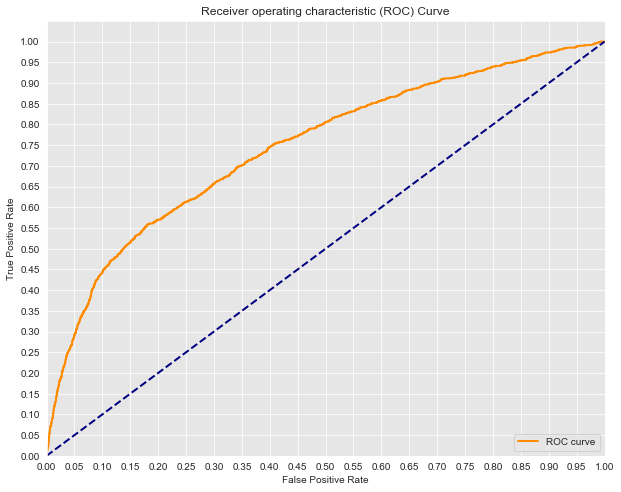

In [94]:
y_score = random_forest.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_score[:,1])

print(auc(fpr,tpr), threshold)

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [95]:
feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [96]:
feature_importances

,importance
PAY_2,0.178297
PAY_0,0.170721
MARRIAGE_single,0.101179
PAY_3,0.099329
PAY_4,0.069702
PAY_5,0.066190
PAY_AMT1,0.056741
PAY_AMT3,0.033258
PAY_AMT4,0.024884
PAY_6,0.024786


In [97]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,100.00
7,Decision Tree,100.00
1,KNN,83.24
3,Random Forest,77.91
2,Logistic Regression,61.80
6,Linear SVC,57.78
5,Stochastic Gradient Decent,48.28
4,Naive Bayes,32.44
